In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\danig\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Exploratory Data Analysis

In [22]:
df = pd.read_csv(path+'/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [23]:
y = df['Class'] 
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

### Class Imbalance

In [24]:
fraud = 0
not_fraud = 0
for i in y:
  if i == 1:
    fraud = fraud+1
  else:
    not_fraud = not_fraud+1

print("Not Fraud:", not_fraud, "->", round(not_fraud/len(y)*100, 2), "%")
print("Fraud:", fraud, "->", round((fraud)/len(y)*100, 2), "%")

Not Fraud: 284315 -> 99.83 %
Fraud: 492 -> 0.17 %


Com es pot observar el dataset està molt imbalancejat, per tant, no ho avaluarem amb 'accuracy' ... 
*TODO: Explicar la metrica a utilizar*

### Valors NaN

In [25]:
df.isnull().values.any()

np.False_

Aquest dataset no te Nans, per tant, no requereix un tractament d'aquests.

### Correlació

<Axes: >

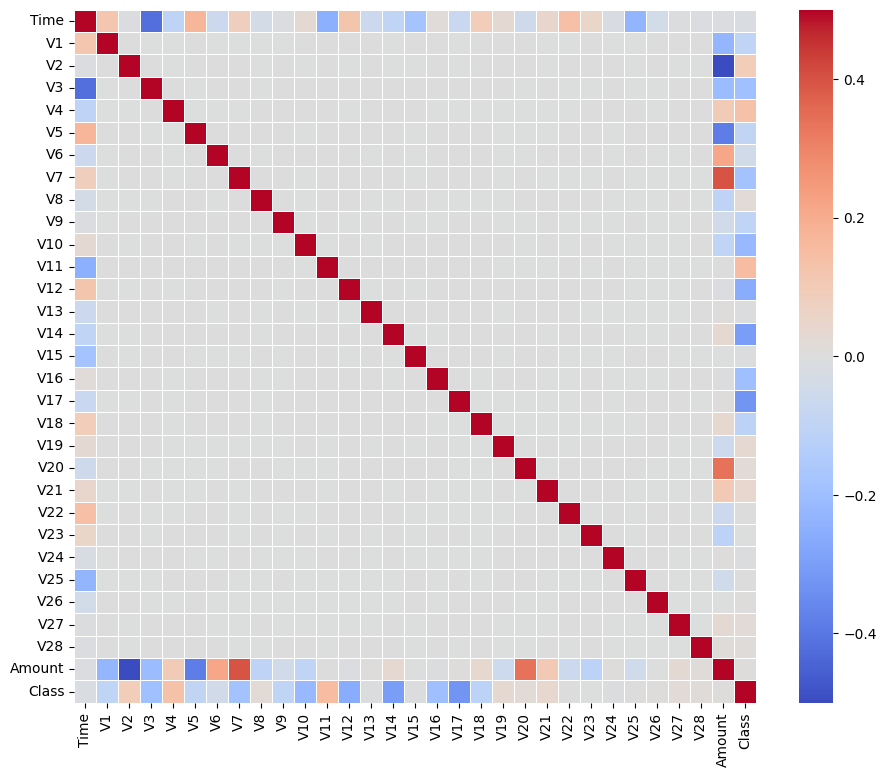

In [26]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(df.corr(), center=0, cmap='coolwarm', linewidths=.5, vmax=0.5, vmin=-0.5)

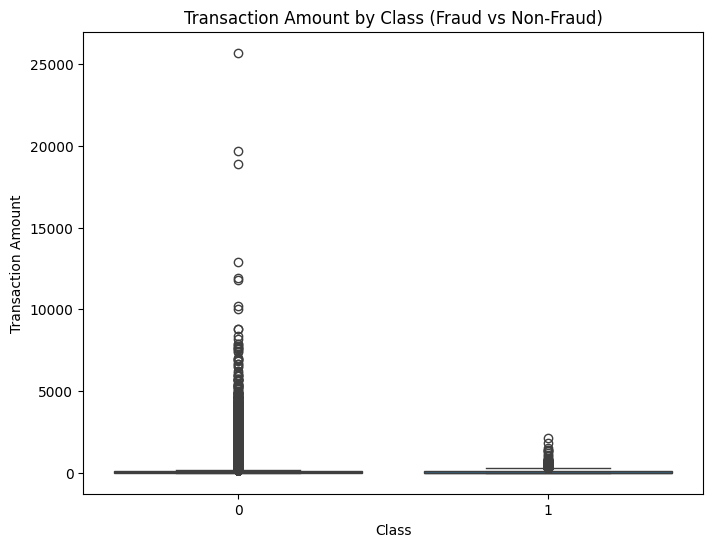

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Transaction Amount by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

In [28]:
scaler = preprocessing.StandardScaler()

#standard scaling
df['std_Amount'] = scaler.fit_transform(df['Amount'].values.reshape (-1,1))

#removing Amount
df_new = df.drop("Amount", axis=1)
df_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


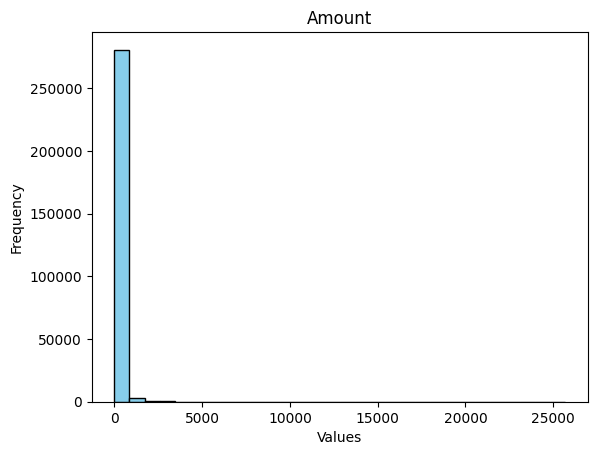

In [51]:
plt.hist(df['Amount'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Amount')

plt.show()

In [49]:
for i in df_new.keys():
    print(i, "index:", df_new[i].idxmax(), "- value:", df_new[i][df_new[i].idxmax()])

Time index: 284806 - value: 172792.0
V1 index: 193547 - value: 2.45492999121121
V2 index: 154684 - value: 22.0577289904909
V3 index: 118764 - value: 9.38255843282114
V4 index: 151296 - value: 16.8753440335975
V5 index: 39769 - value: 34.8016658766686
V6 index: 274771 - value: 73.3016255459646
V7 index: 274771 - value: 120.589493945238
V8 index: 17480 - value: 20.0072083651213
V9 index: 118764 - value: 15.5949946071278
V10 index: 118764 - value: 23.7451361206545
V11 index: 8296 - value: 12.0189131816199
V12 index: 65423 - value: 7.8483920756446
V13 index: 274771 - value: 7.12688295859376
V14 index: 65423 - value: 10.5267660517847
V15 index: 274771 - value: 8.87774159774277
V16 index: 274771 - value: 17.3151115176278
V17 index: 10900 - value: 9.25352625047285
V18 index: 58465 - value: 5.04106918541184
V19 index: 189242 - value: 5.59197142733558
V20 index: 58465 - value: 39.4209042482199
V21 index: 102441 - value: 27.2028391573154
V22 index: 65423 - value: 10.5030900899454
V23 index: 2287

### Undersample

### Oversample